In [1]:
import python_speech_features
import os
import librosa
import random
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models

In [2]:
dataset_path_train = "/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/training"
targets = [name for name in os.listdir(dataset_path_train) if os.path.isdir(os.path.join(dataset_path_train, name))]
targets.sort()
print(targets)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [3]:
dataset_path_test = "/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/testing"
targets_test = [name for name in os.listdir(dataset_path_test) if os.path.isdir(os.path.join(dataset_path_test, name))]
targets_test.sort()
print(targets_test)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


# Extracting MFCCs

In [4]:
speech_files_train = []
y_train = []
for index, target in enumerate(targets):
    speech_files_train.append(os.listdir(os.path.join(dataset_path_train, target)))
    y_train.append(np.ones(len(speech_files_train[index])) * index)
speech_files_train = [item for sublist in speech_files_train for item in sublist]
y_train = [int(item) for sublist in y_train for item in sublist]
for index, target in zip(y_train, speech_files_train):
    speech_path = os.path.join(dataset_path_train, str(index), target)
    print(speech_path)

/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/training/0/abishek_0_rec1.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/training/0/bhavya_0_rec1.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/training/0/bavapriyan_0_rec5.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/training/0/akash_0_rec1.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/training/0/akash_0_rec5.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/training/0/abishek_0_rec3.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/training/0/bhavya_0_rec3.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/training/0/ajay_0_rec2.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/training/0/arjun_0_rec5.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/training/0/ari_0_rec2.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/training/0/bavapriy

In [5]:
speech_files_test = []
y_test = []
for index, target in enumerate(targets_test):
    speech_files_test.append(os.listdir(os.path.join(dataset_path_test, target)))
    y_test.append(np.ones(len(speech_files_test[index])) * index)
speech_files_test = [item for sublist in speech_files_test for item in sublist]
y_test = [int(item) for sublist in y_test for item in sublist]
for index, target in zip(y_test, speech_files_test):
    speech_path = os.path.join(dataset_path_test, str(index), target)
    print(speech_path)

/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/testing/0/indu_0_rec1.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/testing/0/indu_0_rec4.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/testing/0/indu_0_rec2.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/testing/0/indu_0_rec5.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/testing/0/indu_0_rec3.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/testing/1/indu_1_rec3.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/testing/1/indu_1_rec2.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/testing/1/indu_1_rec1.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/testing/1/indu_1_rec4.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/testing/1/indu_1_rec5.wav
/home/main_dude/Projects/speech_tech/new_dataset/spk_dependent/testing/2/indu_2_rec1.wav
/home/main_dude/Proje

In [6]:
mfcc_features_train = []
mfcc_delta_train = []
mfcc_ddelta_train = []
invalid_count = 0
for index, target in zip(y_train, speech_files_train):
    speech_path = os.path.join(dataset_path_train, str(index), target)
    signal, fs = librosa.load(speech_path, sr = 16000)
    mfccs = python_speech_features.base.mfcc(signal, 
                                             samplerate = fs,
                                             winlen = 0.025,
                                             winstep = 0.01,
                                             numcep = 13,
                                             nfilt = 20,
                                             nfft = 2048,
                                             lowfreq=100, 
                                             highfreq=None,
                                             preemph = 0.97,
                                             ceplifter = 0,
                                             appendEnergy = True,
                                             winfunc = np.hanning)
    delta = librosa.feature.delta(mfccs, mfccs.shape[1])
    ddelta = librosa.feature.delta(delta, delta.shape[1])
    if mfccs.shape[0] != 99:
        print(speech_path)
        invalid_count += 1
    else:
        mfcc_delta_train.append(delta) 
        mfcc_features_train.append(mfccs)  
        mfcc_ddelta_train.append(ddelta)

In [7]:
mfcc_features_test = []
mfcc_delta_test = []
mfcc_ddelta_test = []
invalid_count = 0
for index, target in zip(y_test, speech_files_test):
    speech_path = os.path.join(dataset_path_test, str(index), target)
    signal, fs = librosa.load(speech_path, sr = 16000)
    mfccs = python_speech_features.base.mfcc(signal, 
                                             samplerate = fs,
                                             winlen = 0.025,
                                             winstep = 0.01,
                                             numcep = 13,
                                             nfilt = 20,
                                             nfft = 2048,
                                             lowfreq=100, 
                                             highfreq=None,
                                             preemph = 0.97,
                                             ceplifter = 0,
                                             appendEnergy = True,
                                             winfunc = np.hanning)
    delta = librosa.feature.delta(mfccs, mfccs.shape[1])
    ddelta = librosa.feature.delta(delta, delta.shape[1])
    if mfccs.shape[0] != 99:
        print(speech_path)
        invalid_count += 1
    else:
        mfcc_delta_test.append(delta) 
        mfcc_features_test.append(mfccs)  
        mfcc_ddelta_test.append(ddelta)

In [8]:
print(invalid_count)

0


In [9]:
mfcc_features_train= np.array(mfcc_features_train)
mfcc_delta_train = np.array(mfcc_delta_train)
mfcc_ddelta_train = np.array(mfcc_ddelta_train)
mfcc_26_train = []
for i in range(mfcc_features_train.shape[0]):
    mfcc_26_temp = np.hstack((mfcc_features_train[i], mfcc_delta_train[i]))
    mfcc_26_temp = np.hstack((mfcc_26_temp, mfcc_ddelta_train[i]))
    mfcc_26_train.append(mfcc_26_temp.transpose())
print(mfcc_26_train[0].shape)

(39, 99)


In [10]:
mfcc_features_test= np.array(mfcc_features_test)
mfcc_delta_test = np.array(mfcc_delta_test)
mfcc_ddelta_test = np.array(mfcc_ddelta_test)
mfcc_26_test = []
for i in range(mfcc_features_test.shape[0]):
    mfcc_26_temp = np.hstack((mfcc_features_test[i], mfcc_delta_test[i]))
    mfcc_26_temp = np.hstack((mfcc_26_temp, mfcc_ddelta_test[i]))
    mfcc_26_test.append(mfcc_26_temp.transpose())
print(mfcc_26_test[0].shape)

(39, 99)


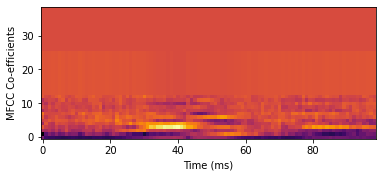

In [11]:
fig = plt.figure()
plt.imshow(mfcc_26_train[0], cmap='inferno', origin='lower')
plt.xlabel('Time (ms)')
plt.ylabel('MFCC Co-efficients')
plt.show()

In [12]:
x_train, x_val, y_train, y_val = train_test_split(mfcc_26_train, y_train, test_size = 0.1, random_state = 69)
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(mfcc_26_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(495, 39, 99)
(55, 39, 99)
(50, 39, 99)
(495,)
(55,)
(50,)


# MODEL TRAINING

In [13]:
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
sample_shape = x_test.shape[1:]
print(x_train.shape)
print(sample_shape)

(495, 39, 99, 1)
(39, 99, 1)


In [ ]:
keras.backend.clear_session()
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(targets), activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=50, 
                    batch_size=50, 
                    validation_data=(x_val, y_val))

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
models.save_model(model, "digit_recog_spk_independent.h5")

# Model Testing

In [14]:
model = keras.models.load_model('digit_recog_spk_independent.h5')

In [15]:
for i in range(10, 15):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 2  Prediction: [[1.9179922e-01 6.2600528e-05 2.9395553e-01 1.0435079e-04 4.5798483e-01
  3.5024343e-05 5.5075131e-02 5.2607652e-07 9.8258269e-04 1.2766992e-07]]
Answer: 2  Prediction: [[2.3545006e-03 5.5001717e-04 8.5835922e-01 2.0384522e-04 1.2561870e-01
  6.7429910e-06 1.2666076e-02 1.6740070e-07 2.4051704e-04 1.8399034e-07]]
Answer: 2  Prediction: [[7.7909548e-03 7.9364354e-06 2.7870908e-01 1.8001145e-06 7.1127808e-01
  4.5201550e-06 2.1983874e-03 5.9702877e-08 9.1164948e-06 1.9184434e-09]]
Answer: 2  Prediction: [[7.8126212e-04 1.5569033e-04 1.2903243e-01 1.2809930e-05 8.6896533e-01
  3.1681666e-05 1.0093958e-03 1.7011273e-06 9.6163812e-06 6.3952747e-08]]
Answer: 2  Prediction: [[8.3793856e-02 1.5699243e-02 1.2572782e-01 1.0781059e-03 6.8817574e-01
  1.9387614e-03 7.7580206e-02 9.5618474e-05 5.8595208e-03 5.1087740e-05]]


In [16]:
model.evaluate(x=x_test, y=y_test)

2/2 [==============================] - 0s 58ms/step - loss: 1.7129 - accuracy: 0.5200


[1.7129464149475098, 0.5199999809265137]

In [17]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

Test set accuracy: 52%


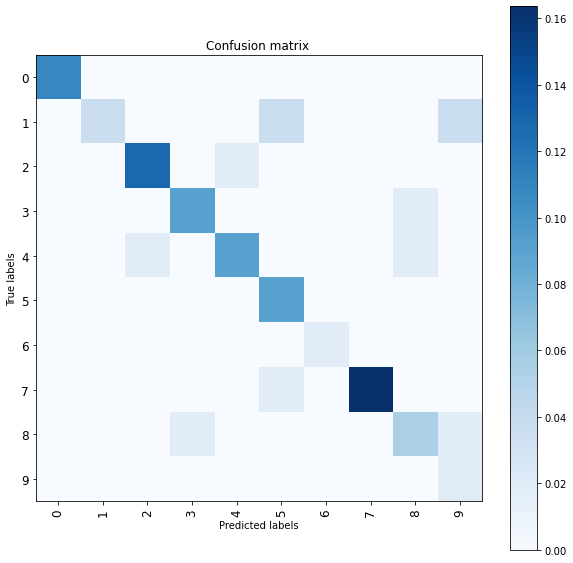

In [18]:
from sklearn.metrics import confusion_matrix
targets = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
y = np.argmax(model.predict(x_val), axis=1)
cm = confusion_matrix(y_val, y,  normalize="all")
%matplotlib inline
plt.close()
plt.figure(figsize = (10,10))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(np.arange(0, 10, 1), targets, rotation=90)
plt.yticks(np.arange(0, 10, 1), targets)
plt.tick_params(labelsize=12)
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()